In [5]:
%matplotlib inline

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

### Build Graph

In [6]:
df = pd.read_csv("transactiongraph3.csv")

In [7]:
graph = nx.from_pandas_edgelist(df,source="addressIn",target="addressOut")

In [8]:
nx.info(graph)

'Graph with 3531 nodes and 3683 edges'

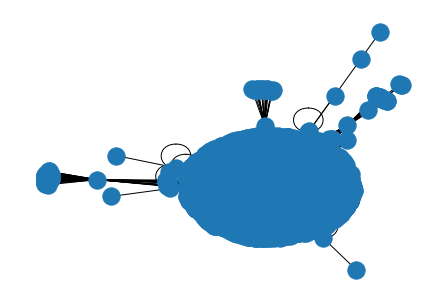

In [9]:
nx.draw(graph, with_labels = False)

### Node2Vec Algorithm

In [10]:
node2vec = Node2Vec(graph, dimensions=20, walk_length=16, num_walks=100, workers=2)

Computing transition probabilities:   0%|          | 0/3531 [00:00<?, ?it/s]

In [11]:
model = node2vec.fit(window=10, min_count=1)

In [12]:
type(model)

gensim.models.word2vec.Word2Vec

In [13]:
embeddings = np.array(model)

In [14]:
type(embeddings)

numpy.ndarray

In [15]:
print(embeddings)

Word2Vec(vocab=3531, vector_size=20, alpha=0.025)


In [16]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)

In [17]:
#embeddings_2d = tsne.fit_transform(embeddings)